#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [307]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [308]:
#Number Of Rows and Columns
Number_of_Rows , Number_of_Columns = df.shape
print(f'Number of rows: {Number_of_Rows}')
print(f'Number of columns: {Number_of_Columns}')


Number of rows: 148654
Number of columns: 13


In [309]:
#Data Type of each Column
data_type = df.dtypes
print(f'Data type of each column is :\n{data_type}')

Data type of each column is :
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [310]:
#Checking for missing values
missing_valus = df.isnull().sum()
print(f'The Missing Values in Each Column are:\n {missing_valus}')

The Missing Values in Each Column are:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.


In [311]:
Basic_Statistics = df['TotalPay'].describe()
print(f'The Basic Statistics for Salary are:\n{Basic_Statistics}\n')

#Median Calculation
Median = df['TotalPay'].median()
print(f'The Median Of TotalPay (Salary) is : {Median}')


#Median Calculation
Mode = df['TotalPay'].mode()
print(f'The Mode Of TotalPay (Salary) is : {Mode}')


#Range Calculation
Minimum = df['TotalPay'].min()
Maximum = df['TotalPay'].max()
Range = Maximum - Minimum
print(f'The Range Of TotalPay (Salary) is : {Range}')


The Basic Statistics for Salary are:
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

The Median Of TotalPay (Salary) is : 71426.60999999999
The Mode Of TotalPay (Salary) is : 0    0.0
Name: TotalPay, dtype: float64
The Range Of TotalPay (Salary) is : 568213.56


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

In [312]:
#Data Before Cleaning
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [313]:
#Usig Fillna to replace null values with the mean of the numerical data
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)


#Usig drop as we see the numbers of nulls in Notes and Status are equel to the number of Rows(148654)
#So the best way to clean those columns is Drop Method
df.drop(['Notes','Status'], axis=1, inplace=True)
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

**Removing Negative Values**

In [314]:
df=df[(df["BasePay"] > 0) &(df["OvertimePay"] > 0) & (df["TotalPay"] > 0) & (df["OtherPay"] > 0)]

columns = ["BasePay", "OvertimePay", "TotalPay", "OtherPay"]
for c in columns:
    Negataive_Value_Checker = (df[c] < 0).any()
    
    if Negataive_Value_Checker:
        print(f"The {c} contains negative values ")
    else:
        print(f"The {c} does not contain negative values")


The BasePay does not contain negative values
The OvertimePay does not contain negative values
The TotalPay does not contain negative values
The OtherPay does not contain negative values


4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

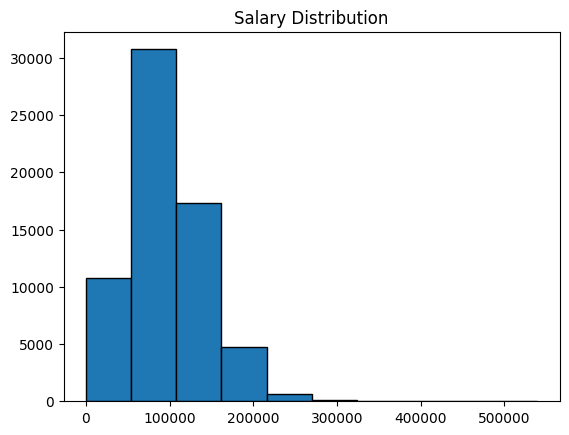

In [315]:
#Histogram For Salary Distribution
plt.title('Salary Distribution')
plt.xlabel='TotalPay'

plt.hist(df['TotalPay'],bins=10,edgecolor='black')
plt.show()

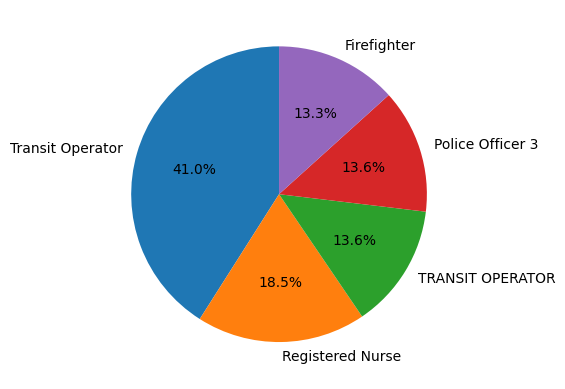

In [316]:
#Pie Chart to represent the proportion of employees in different departments
Dep_Count = df['JobTitle'].value_counts().head()
plt.pie(Dep_Count,labels=Dep_Count.index,autopct='%1.1f%%', startangle=90)
plt.show()


5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [317]:
#Function to Calculate The Summary Statistics for each group
def Calc_Summary_Stat_for_Group(df,groupBy_col):
    Summary_Stat = df.groupby(groupBy_col)['TotalPay'].agg(['mean','max','min'])
    return Summary_Stat.head()  


Salary Grouping by Job Title

In [318]:

Calc_Summary_Stat_for_GroupBy(df,'JobTitle')

,mean,max,min
JobTitle,,,
ACCOUNT CLERK,49555.454000,58527.20,31112.96
AIRPORT COMMUNICATIONS OPERATOR,82775.968462,106776.25,41169.14
AIRPORT COMMUNICATIONS SUPERVISOR,88483.660000,88483.66,88483.66
AIRPORT ELECTRICIAN,108707.828235,118617.32,98061.21
AIRPORT ELECTRICIAN SUPERVISOR,117088.760000,118585.40,115592.12


Salary Grouping by Year

In [319]:
Calc_Summary_Stat_for_GroupBy(df,'Year')

,mean,max,min
Year,,,
2011,90232.496779,538909.28,192.43
2012,93837.444956,362844.66,312.19
2013,99549.471528,347102.32,491.50
2014,95602.853478,390111.98,1083.11


In [320]:
#Function To calculate the average salary for each group and visualize it
def Calc_Mean_ForEach_Group(df,groupBy_val):
    Mean_Job_Salary = df.groupby(groupBy_val)['TotalPay'].mean()
    plt.title(f'Distribution of Mean Total Pay for Each {groupBy_val}')
    plt.pie(Mean_Job_Salary.head(),labels=Mean_Job_Salary.head().index,autopct='%1.1f%%', startangle=90)

    return plt.show()
    

The Average Salary Across Each Job Title

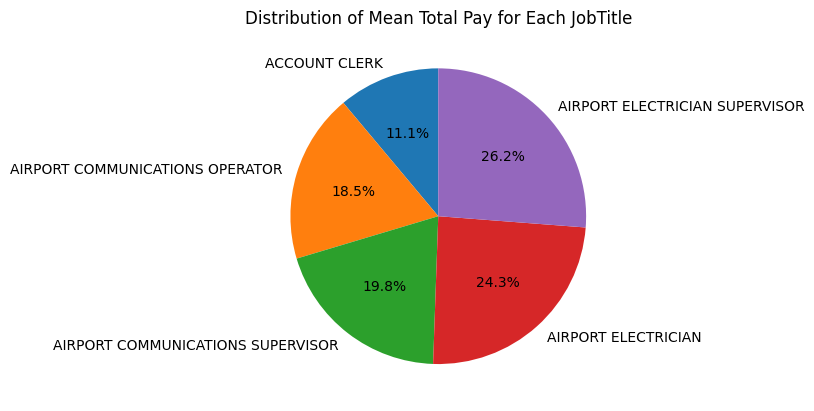

In [321]:
Calc_Mean_ForEach_Group(df,'JobTitle')

The Average Salary Across Each Year

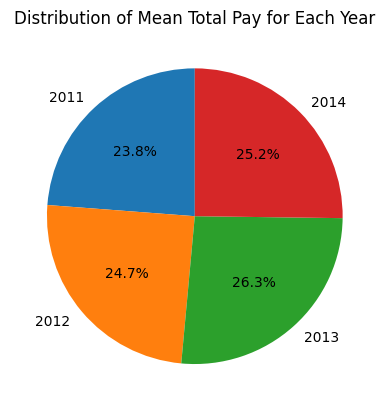

In [322]:
Calc_Mean_ForEach_Group(df,'Year')

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

0.9659024277464177


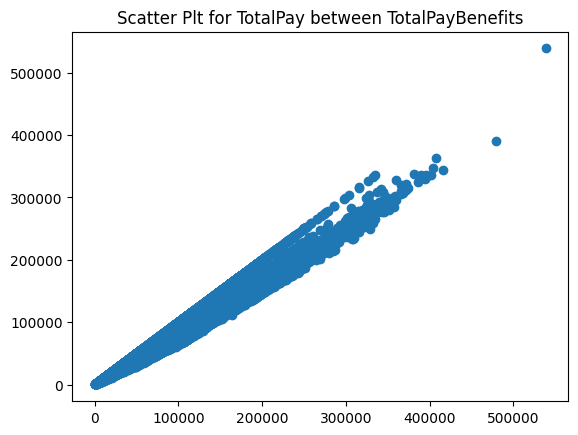

In [323]:
Correlation =df['TotalPay'].corr(df['TotalPayBenefits'])
print(Correlation)
plt.title('Scatter Plt for TotalPay between TotalPayBenefits')
plt.scatter(x='TotalPayBenefits' ,y= 'TotalPay' ,  data=df)
plt.show()

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

 *Data Overview*
  - The dataset consists of information about employees, including columns such as 'EmployeeName,' 'JobTitle,' 'TotalPay,' etc.

    
 *Data Cleaning*
 - Checked For Nulls in columns  to handle them before starting making any analysis.
 - Checked For Negative Values In Salaries to remove unwanted entries.


 *Insights*
 - Identified variations in mean salaries across different job titles and years.
 - Noticed That The High Mean Of salary is in Year 2013 (26.3%) and the job title is Airport Elecrician (24.3%).
 - Visualized the relationship between 'TotalPay' and the 'TotalPayBenefits' through a scatter plot.
 - Noticed That There is a Direct Relationship with linear equation So The higher the TotalPay, the higher TotalPayBenefits